In [219]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)

In [220]:
rays = 1

inc_z = 1
z = np.array([800])
velo_low = np.array([2000])
velo_up = np.array([3500])
layers = np.shape(z)[0]

dz = np.transpose(np.array([np.arange(0, z+1, inc_z)]))
dz = np.flip(dz, 0)
# print(dz)
b = np.zeros([1, layers])
for i in range(layers):
    b[0, i] = (velo_up[i] - velo_low[i]) / z[i]

In [221]:
theta    = np.zeros([1, rays])
for i in range(0, rays):
    theta[0, i] = (1 + i) * 20
    
# print(theta)

In [222]:
p        = np.zeros([1, rays])
for i in range(rays):
    p[0, i] = np.sin(np.deg2rad(theta[0, i])) / velo_low[0]
print(p)

pz        = np.zeros([layers, rays])
for j in range(rays):
    for i in range(layers):
        pz[i, j] = np.sqrt((1/(velo_low[i]))**(2) - (p[0, j])**2) # perhitungan nilai pz setiap ray pada setiap lapisan
print(pz)  

[[0.00017101]]
[[0.00046985]]


In [223]:
x = np.zeros([np.shape(dz)[0], 1])

for j in range(layers):
    for i in range(0, np.shape(dz)[0]):
        var1 = 1 / ((p[0, j]**2) * (b[0, j]**2))
        var2 = (dz[i, 0] - dz[0, 0] + (velo_low[j]/b[0 , j]))**(2)
        print(var2)
        var3 = (pz[j, 0] * velo_low[j]) / (b[0 , j] * p[0, j])
        x[i, 0] = np.sqrt(var1 - var2) + x[0, 0] + var3
# print(b)

1137777.777777778
1135645.4444444445
1133515.1111111112
1131386.777777778
1129260.4444444445
1127136.1111111112
1125013.777777778
1122893.4444444445
1120775.1111111112
1118658.777777778
1116544.4444444445
1114432.1111111112
1112321.777777778
1110213.4444444445
1108107.1111111112
1106002.777777778
1103900.4444444445
1101800.1111111112
1099701.777777778
1097605.4444444445
1095511.1111111112
1093418.777777778
1091328.4444444445
1089240.1111111112
1087153.777777778
1085069.4444444445
1082987.1111111112
1080906.777777778
1078828.4444444445
1076752.1111111112
1074677.777777778
1072605.4444444445
1070535.1111111112
1068466.777777778
1066400.4444444445
1064336.1111111112
1062273.777777778
1060213.4444444445
1058155.1111111112
1056098.777777778
1054044.4444444445
1051992.1111111112
1049941.777777778
1047893.4444444446
1045847.1111111112
1043802.777777778
1041760.4444444446
1039720.1111111112
1037681.777777778
1035645.4444444446
1033611.1111111112
1031578.777777778
1029548.4444444446
1027520.111

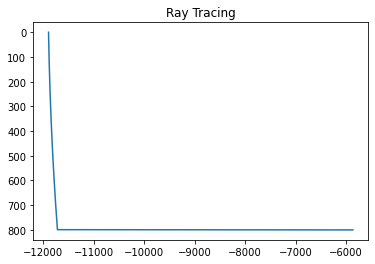

In [224]:
fig, ax = plt.subplots()
ax.plot(x[:, 0]*(-1), dz[:, 0])
ax.set_title("Ray Tracing")
plt.gca().invert_yaxis()
plt.show()